In [1]:
import sys
sys.path

['',
 'd:\\learn\\.virtualenvs\\tf-lab\\scripts\\python36.zip',
 'd:\\learn\\.virtualenvs\\tf-lab\\DLLs',
 'd:\\learn\\.virtualenvs\\tf-lab\\lib',
 'd:\\learn\\.virtualenvs\\tf-lab\\scripts',
 'c:\\users\\kranthikumar\\anaconda3\\Lib',
 'c:\\users\\kranthikumar\\anaconda3\\DLLs',
 'd:\\learn\\.virtualenvs\\tf-lab',
 'd:\\learn\\.virtualenvs\\tf-lab\\lib\\site-packages',
 'D:\\Learn\\PythonProjects\\tf-lab',
 'd:\\learn\\.virtualenvs\\tf-lab\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\KranthiKumar\\.ipython']

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
# from keras.models import Graph

from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization

from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2

from keras.utils import np_utils
from keras.callbacks import EarlyStopping

import copy
# from PIL import Image
from datetime import datetime

%matplotlib inline

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [20]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [21]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [24]:
model = Sequential()

model.add(Conv2D(6, (5, 5), padding='valid', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Conv2D(16, (5, 5), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))

model.add(Conv2D(120, (1, 1), padding='valid'))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation('softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
activation_5 (Activation)    (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
activation_6 (Activation)    (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 16)          0         
__________

In [35]:
t1 = datetime.now()
print('Execution Started at: ' + str(t1))

l_rate = 1
sgd = SGD(lr=l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_train, Y_train, batch_size=32, epochs=2,
          verbose=1, validation_data=(X_test, Y_test))

sgd = SGD(lr=0.8 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_train, Y_train, batch_size=32, epochs=3,
          verbose=1, validation_data=(X_test, Y_test))

sgd = SGD(lr=0.4 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_train, Y_train, batch_size=32, epochs=3,
          verbose=1,  validation_data=(X_test, Y_test))

sgd = SGD(lr=0.2 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_train, Y_train, batch_size=32, epochs=4,
          verbose=1,  validation_data=(X_test, Y_test))

sgd = SGD(lr=0.08 * l_rate, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_train, Y_train, batch_size=32, epochs=8,
          verbose=1, validation_data=(X_test, Y_test))

t2 = datetime.now()
print('Execution Ended at: ' + str(t2))
print('Time Taken: ' + str(t2-t1))

Execution Started at: 2018-08-11 13:22:32.598440


d:\learn\.virtualenvs\tf-lab\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 27s 449us/step - loss: 2.3392 - val_loss: 2.3521
Epoch 2/2
60000/60000 [==============================] - 12s 204us/step - loss: 2.3379 - val_loss: 2.3145


d:\learn\.virtualenvs\tf-lab\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 213us/step - loss: 2.3294 - val_loss: 2.3423
Epoch 2/3
60000/60000 [==============================] - 12s 207us/step - loss: 2.3304 - val_loss: 2.3166
Epoch 3/3
60000/60000 [==============================] - 12s 207us/step - loss: 2.3304 - val_loss: 2.3179


d:\learn\.virtualenvs\tf-lab\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 15s 256us/step - loss: 2.3154 - val_loss: 2.3087
Epoch 2/3
60000/60000 [==============================] - 13s 213us/step - loss: 2.3157 - val_loss: 2.3115
Epoch 3/3
60000/60000 [==============================] - 13s 211us/step - loss: 2.3145 - val_loss: 2.3206


d:\learn\.virtualenvs\tf-lab\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 13s 216us/step - loss: 2.3084 - val_loss: 2.3072
Epoch 2/4
60000/60000 [==============================] - 13s 209us/step - loss: 2.3083 - val_loss: 2.3103
Epoch 3/4
60000/60000 [==============================] - 13s 210us/step - loss: 2.3086 - val_loss: 2.3162
Epoch 4/4
60000/60000 [==============================] - 13s 208us/step - loss: 2.3084 - val_loss: 2.3104


d:\learn\.virtualenvs\tf-lab\lib\site-packages\ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 14s 226us/step - loss: 2.3039 - val_loss: 2.3032
Epoch 2/8
60000/60000 [==============================] - 12s 208us/step - loss: 2.3040 - val_loss: 2.3031
Epoch 3/8
60000/60000 [==============================] - 13s 209us/step - loss: 2.3039 - val_loss: 2.3052
Epoch 4/8
60000/60000 [==============================] - 13s 209us/step - loss: 2.3038 - val_loss: 2.3024
Epoch 5/8
60000/60000 [==============================] - 13s 210us/step - loss: 2.3040 - val_loss: 2.3029
Epoch 6/8
60000/60000 [==============================] - 13s 210us/step - loss: 2.3041 - val_loss: 2.3069
Epoch 7/8
60000/60000 [==============================] - 13s 209us/step - loss: 2.3041 - val_loss: 2.3026
Epoch 8/8
60000/60000 [==============================] - 13s 213us/step - loss: 2.3041 - val_loss: 2.3021
Execution Ended at: 2018-08-11 13:27:04.412912
Time Taken: 0:04:31.814472


In [38]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test, verbose=1))

10000/10000 [==============================] - 1s 76us/step
Test classification rate 2.30215


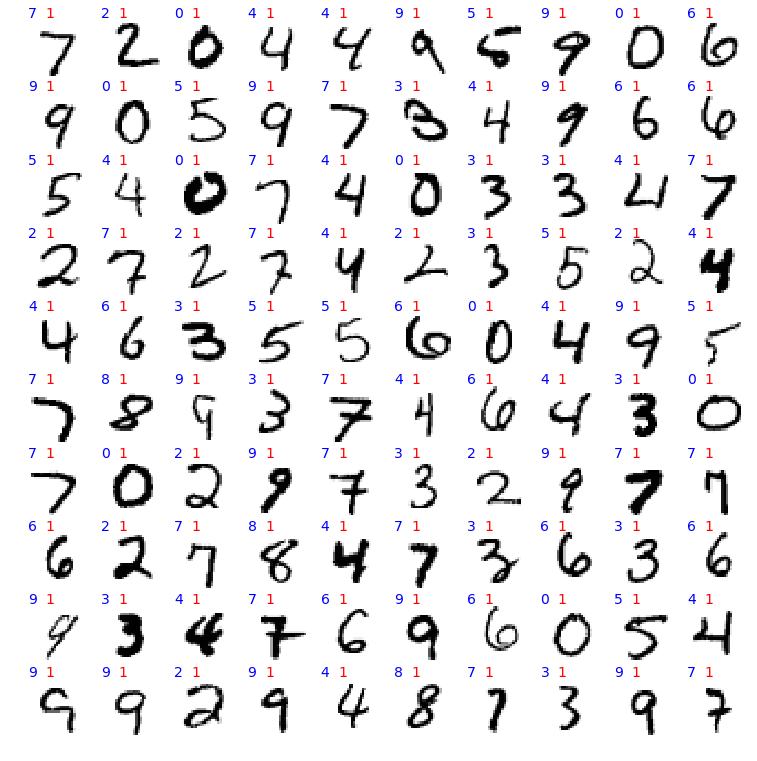

In [39]:
y_hat = model.predict_classes(X_test)
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')